In [14]:
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

In [8]:
train_df = pd.read_csv('./data/training_data_values.csv')

In [9]:
train_labels_df = pd.read_csv('./data/training_data_labels.csv')

In [5]:
full_df = train_df.merge(train_labels_df, on='id')

In [16]:
full_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [6]:
len(full_df)

59400

In [ ]:
drop_columns = ['id', 'funder', 'num_private', 'longitude', 'latitude', 'wpt_name', 'subvillage', 'region_code', 'lga',
                'ward','recorded_by', 'scheme_name', 'extraction_type_group', 'payment', 'quality_group', 
                'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group']

In [ ]:
continuous_columns = ['amount_tsh', 'date_recorded', 'gps_height', 'population', 'construction_year']

In [ ]:
categorical_columns = ['installer', 'basin', 'region', 'district_code', 'public_meeting',
                      'scheme_management', 'permit', 'extraction_type', 'extraction_type_class', 'management', 
                      'management_group', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(full_df.drop(['id', 'status_group'], axis = 1), 
                                                    full_df['status_group'], 
                                                    random_state = 7)

In [20]:
dummy = DummyClassifier(strategy = 'stratified', random_state = 7)

In [21]:
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=7, strategy='stratified')

In [25]:
dummy.score(X_test, y_test)

0.4471380471380471

In [26]:
def dummy(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    """Implements a dummy classifier using sklearn to use as a baseline model to compare with more sophisticated
    models. Returns the mean accuracy of the X_test and y_test values."""
    dummy = DummyClassifier(strategy = 'stratified', random_state = 7)
    dummy.fit(X_train, y_train)
    return dummy.score(X_test, y_test)

In [28]:
dummy(X_train, X_test, y_train, y_test)

0.4471380471380471

In [17]:
train_labels_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


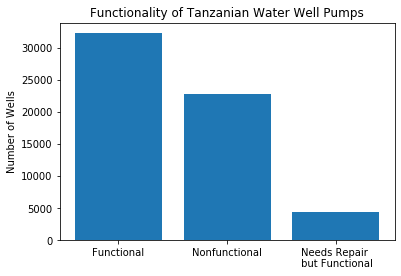

In [33]:
plt.bar(train_labels_df['status_group'].unique(), train_labels_df['status_group'].value_counts(), 
        tick_label = ['Functional', 'Nonfunctional', 'Needs Repair \n but Functional'])
plt.title('Functionality of Tanzanian Water Well Pumps')
plt.ylabel('Number of Wells')
plt.savefig('functionality_barchart.png', dpi = 300, transparent = True);